In [1]:
#imorting necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Read dataset

In [2]:
df= pd.read_csv('Air_line_data.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [3]:
# set Maximum columns to display
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(13354, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [6]:
# Checking null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [7]:
test_data = df[df['Price'].isnull()].to_csv('test_data.csv')

In [8]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
df.shape

(10682, 11)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Most number of bookings Airline .

In [12]:
print('\n',10*'***','Top Airline',10*'***')

#sns.catplot(df['Airline'][:10])
plt.figure(figsize=(14,9))
df['Airline'].value_counts()


 ****************************** Top Airline ******************************


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Figure size 1008x648 with 0 Axes>

### Date of Journey split into Day, Month 

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [14]:
def get_day(day):
    return day.split("/")[0]

def get_month(month):
    return month.split("/")[1]

df['Journey_day'] = df['Date_of_Journey'].apply(lambda x: f"{get_day(x)}")
df['Journey_month'] = df['Date_of_Journey'].apply(lambda x: f"{get_month(x)}")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03


In [15]:
# Now convert them into int type
df['Journey_day'] = df['Journey_day'].astype(int)
df['Journey_month'] = df['Journey_month'].astype(int)

In [16]:
df['Journey_day'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [17]:
df['Journey_month'].unique()

array([3, 5, 6, 4])

#### Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.


In [18]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [20]:
# Extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
# Extracting Hours
df["Arv_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting Minutes
df["Arv_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Now we can drop Arv_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35


In [23]:
df["Dep_hour"] = df["Dep_hour"].astype(int)
df["Dep_min"] = df["Dep_min"].astype(int)
df["Arv_hour"] = df["Arv_hour"].astype(int)
df["Arv_min"] = df["Arv_min"].astype(int)

In [24]:
# spliting Duration time into hrs,min
s=pd.to_timedelta(df['Duration'])
df['Dur_hour']=s.dt.components['hours']
df['Dur_min']=s.dt.components['minutes']

In [25]:
df.drop(["Duration"], axis = 1, inplace = True)

In [26]:
df["Dur_min"] = df["Dur_min"].astype(int)
df["Dur_hour"] = df["Dur_hour"].astype(int)

In [27]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


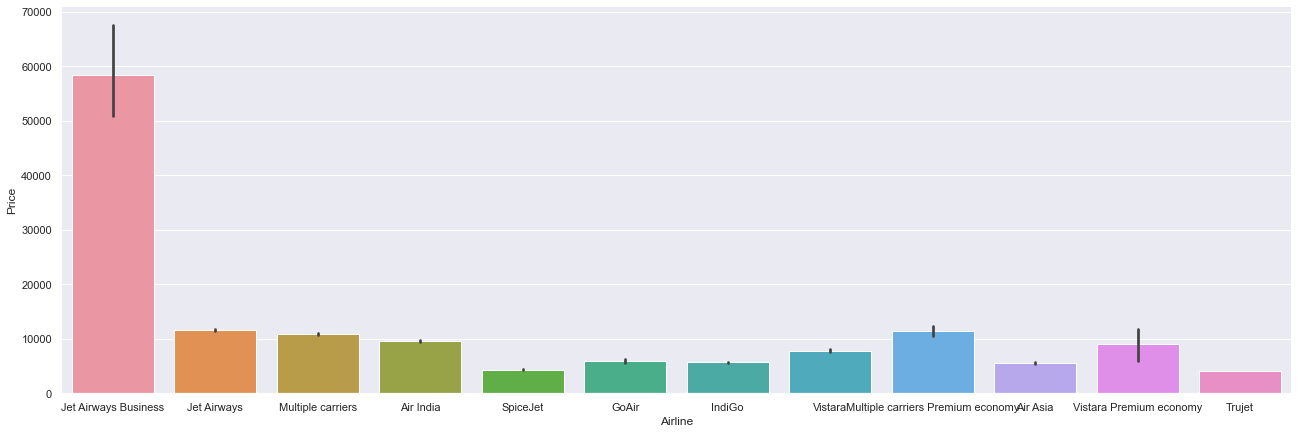

In [28]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 3)
plt.show()

## Handling Categorical Data

1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [29]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arv_hour,Arv_min,Dur_hour,Dur_min
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,16,50,21,35,4,45


In [33]:
num_df = df.select_dtypes(include=np.number)
num_df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arv_hour', 'Arv_min', 'Dur_hour', 'Dur_min'],
      dtype='object')

In [34]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        10682 non-null  object 
 1   Source         10682 non-null  object 
 2   Destination    10682 non-null  object 
 3   Total_Stops    10682 non-null  int64  
 4   Price          10682 non-null  float64
 5   Journey_day    10682 non-null  int32  
 6   Journey_month  10682 non-null  int32  
 7   Dep_hour       10682 non-null  int32  
 8   Dep_min        10682 non-null  int32  
 9   Arv_hour       10682 non-null  int32  
 10  Arv_min        10682 non-null  int32  
 11  Dur_hour       10682 non-null  int32  
 12  Dur_min        10682 non-null  int32  
dtypes: float64(1), int32(8), int64(1), object(3)
memory usage: 834.5+ KB


In [36]:
df.shape

(10682, 13)

In [37]:
X = df.drop('Price', axis=1).values
y = df['Price'].values

In [38]:
X.shape

(10682, 12)

In [39]:
X

array([['IndiGo', 'Banglore', 'New Delhi', ..., 10, 2, 50],
       ['Air India', 'Kolkata', 'Banglore', ..., 15, 7, 25],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 25, 19, 0],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 20, 3, 0],
       ['Vistara', 'Banglore', 'New Delhi', ..., 10, 2, 40],
       ['Air India', 'Delhi', 'Cochin', ..., 15, 8, 20]], dtype=object)

### OneHotEncoder for Categorical features

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [41]:
X.shape

(10682, 32)

In [42]:
X

array([[0.0, 0.0, 0.0, ..., 10, 2, 50],
       [0.0, 1.0, 0.0, ..., 15, 7, 25],
       [0.0, 0.0, 0.0, ..., 25, 19, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 20, 3, 0],
       [0.0, 0.0, 0.0, ..., 10, 2, 40],
       [0.0, 1.0, 0.0, ..., 15, 8, 20]], dtype=object)

In [43]:
y

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [44]:
X.ndim

2

In [45]:
#y= y.reshape(-1,1)

In [46]:
y.ndim

1

In [47]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
#y = sc.fit_transform(y)

In [48]:
X

array([[0.0, 0.0, 0.0, ..., 10, 2, 50],
       [0.0, 1.0, 0.0, ..., 15, 7, 25],
       [0.0, 0.0, 0.0, ..., 25, 19, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 20, 3, 0],
       [0.0, 0.0, 0.0, ..., 10, 2, 40],
       [0.0, 1.0, 0.0, ..., 15, 8, 20]], dtype=object)

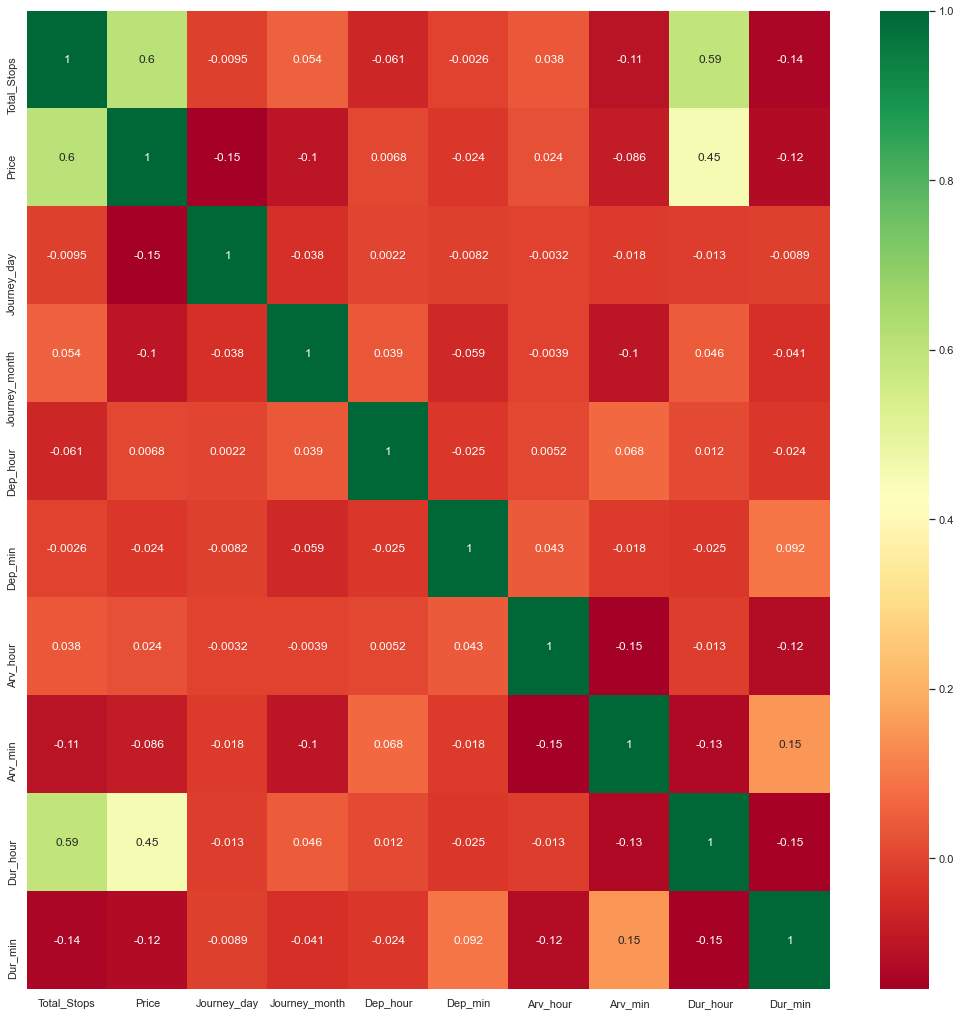

In [49]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Spliting Dataset into Trainingset and Test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Random Forest 

In [51]:
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(n_estimators= 700)
RFC.fit(X_train, y_train)

RandomForestRegressor(n_estimators=700)

In [52]:
y_pred = RFC.predict(X_test)

In [53]:
RFC.score(X_train,y_train)

0.956483062478296

In [54]:
RFC.score(X_test,y_test)

0.8060927322076455

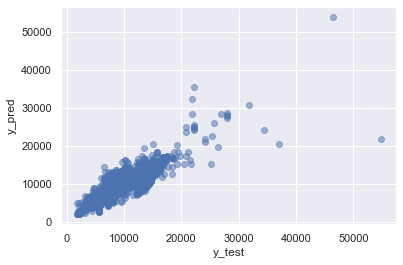

In [55]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

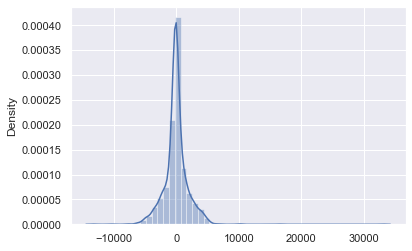

In [56]:
sns.distplot(y_test-y_pred)

# XGboost Model apply

In [57]:
import xgboost as xgb
regressor= xgb.XGBRegressor(n_estimators=400)
regressor.fit(X_train,y_train)

[13:59:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=400)

In [58]:
XG_pred=regressor.predict(X_test)

In [59]:
regressor.score(X_train,y_train)

0.8452435413876913

In [60]:
regressor.score(X_test,y_test)

0.7911374871981325

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

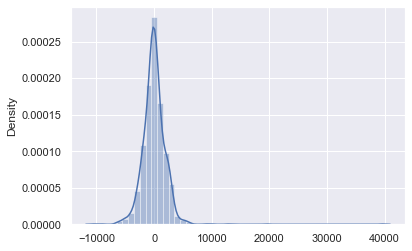

In [61]:
sns.distplot(y_test-XG_pred)